<a href="https://colab.research.google.com/github/tejashreereddyy/FMML-Project-and-Labs/blob/main/AIML_III_Module_3_Lab_2_Implementing_KNN_from_scratch_and_visualize_Algorithm_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Students Internship Batch of 2024**
### MODULE 3: CLASSIFICATION-1
### LAB-2 : Implementing KNN from scratch and visualize Algorithm performance
## TASK
Modify the KNN function you wrote to return all the K-nearest neighbours along with their distances,instead of just the output that was most common. You don't need to find out accuracy, just modify the function and return the k-nearest neighbours and distances.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load a sample dataset (e.g., Iris dataset)
data = load_iris()
pts = data.data  # Feature data (input)
tgts = data.target  # Target labels (output)

# Split the data into training and testing sets
pts, test_pts, tgts, test_tgts = train_test_split(pts, tgts, test_size=0.3, random_state=42)

# Initialize KNN with a chosen metric, e.g., Euclidean
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

# Fit the model with the training data
knn.fit(pts, tgts)

# Find the k-nearest neighbors and their distances for the test data
distances, indices = knn.kneighbors(test_pts)

# Return the distances and the corresponding neighbors (their indices)
print("Distances to k-nearest neighbors for each test point: ")
print(distances)

print("Indices of k-nearest neighbors for each test point: ")
print(indices)

# Optionally, you can also retrieve the corresponding labels of the nearest neighbors
nearest_labels = tgts[indices]
print("Labels of the k-nearest neighbors for each test point: ")
print(nearest_labels)


Distances to k-nearest neighbors for each test point: 
[[0.2236068  0.3        0.43588989]
 [0.33166248 0.46904158 0.50990195]
 [0.41231056 0.54772256 0.89442719]
 [0.2        0.24494897 0.33166248]
 [0.31622777 0.34641016 0.37416574]
 [0.28284271 0.3        0.34641016]
 [0.4472136  0.50990195 0.51961524]
 [0.36055513 0.46904158 0.51961524]
 [0.26457513 0.50990195 0.53851648]
 [0.14142136 0.26457513 0.28284271]
 [0.2236068  0.37416574 0.42426407]
 [0.14142136 0.2        0.26457513]
 [0.33166248 0.34641016 0.41231056]
 [0.1        0.17320508 0.2       ]
 [0.14142136 0.14142136 0.24494897]
 [0.42426407 0.46904158 0.47958315]
 [0.36055513 0.38729833 0.43588989]
 [0.17320508 0.24494897 0.26457513]
 [0.3        0.31622777 0.31622777]
 [0.42426407 0.43588989 0.46904158]
 [0.17320508 0.2236068  0.24494897]
 [0.14142136 0.24494897 0.28284271]
 [0.2        0.2236068  0.2236068 ]
 [0.33166248 0.37416574 0.38729833]
 [0.41231056 0.88317609 0.92736185]
 [0.36055513 0.36055513 0.37416574]
 [0.6    

# TASK-2
In the above cells, we saw the Voronoi diagram of the data and plotted the KNN decision boundaries
by only considering two attributes of the dataset. You must be already familiar with PCA.
Apply PCA on the dataset above to reduce it to two dimensions.
Plot the Voronoi diagram and Decision boundaries after that.

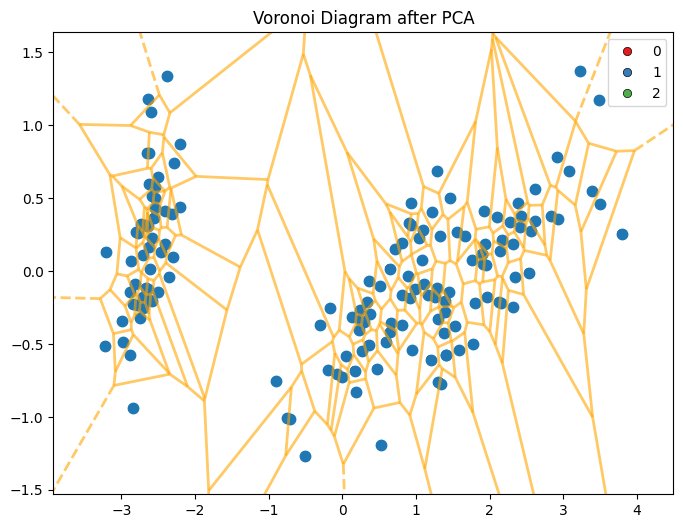

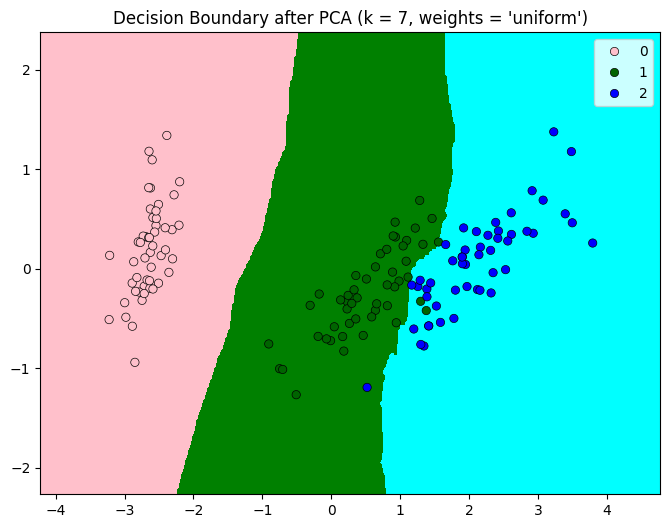

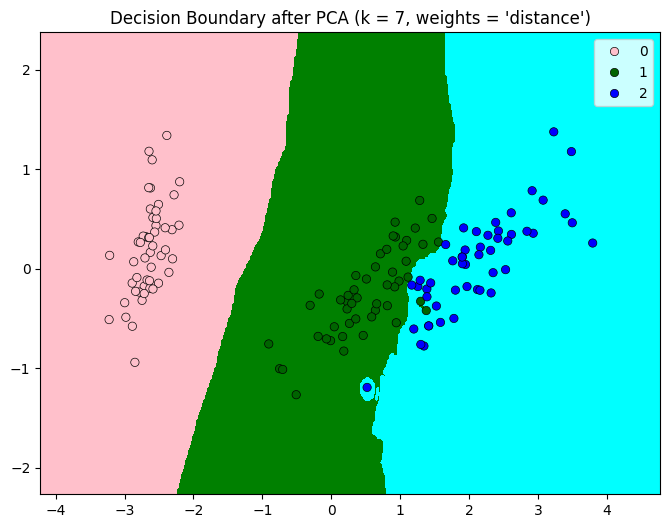

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib.colors import ListedColormap
import seaborn as sns

# Load the dataset (using Iris dataset as an example)
data = load_iris()
X = data.data  # Feature data
y = data.target  # Target labels

# Step 1: Apply PCA to reduce to two dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 2: Plot the Voronoi Diagram
def plot_voronoi(points, labels):
    vor = Voronoi(points)
    fig, ax = plt.subplots(figsize=(8, 6))
    voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='orange', line_width=2, line_alpha=0.6, point_size=15)
    sns.scatterplot(x=points[:, 0], y=points[:, 1], hue=labels, palette='Set1', edgecolor='black')
    plt.title("Voronoi Diagram after PCA")
    plt.show()

plot_voronoi(X_pca, y)

# Step 3: Plot the Decision Boundaries
def decision_boundary_plot(x_dec, y_dec, k):
    h = .02  # step size in the mesh

    # Create color maps
    n = len(set(y_dec))
    cmap_light = ListedColormap(['pink', 'green', 'cyan', 'yellow'][:n])
    cmap_bold = ['pink', 'darkgreen', 'blue', 'yellow'][:n]

    for weights in ['uniform', 'distance']:
        # Create an instance of KNeighborsClassifier and fit the data
        clf = KNeighborsClassifier(n_neighbors=k, weights=weights)
        clf.fit(x_dec, y_dec)

        # Define the boundaries
        x_min, x_max = x_dec[:, 0].min() - 1, x_dec[:, 0].max() + 1
        y_min, y_max = x_dec[:, 1].min() - 1, x_dec[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Reshape the result and plot the decision boundary
        Z = Z.reshape(xx.shape)
        plt.figure(figsize=(8, 6))
        plt.contourf(xx, yy, Z, cmap=cmap_light)

        # Plot the training points
        sns.scatterplot(x=x_dec[:, 0], y=x_dec[:, 1], hue=y_dec,
                        palette=cmap_bold, alpha=1.0, edgecolor="black")
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title(f"Decision Boundary after PCA (k = {k}, weights = '{weights}')")
        plt.show()

# Use the PCA-reduced data
decision_boundary_plot(X_pca, y, k=7)


In [4]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

# Load the dataset into a pandas DataFrame
data = pd.read_csv('car_evaluation.csv')
print(data.head())


Saving car_evaluation.csv to car_evaluation.csv
  buying price maintenance cost num_doors num_persons lug_boot safety decision
0        vhigh            vhigh         2           2    small    med    unacc
1        vhigh            vhigh         2           2    small   high    unacc
2        vhigh            vhigh         2           2      med    low    unacc
3        vhigh            vhigh         2           2      med    med    unacc
4        vhigh            vhigh         2           2      med   high    unacc


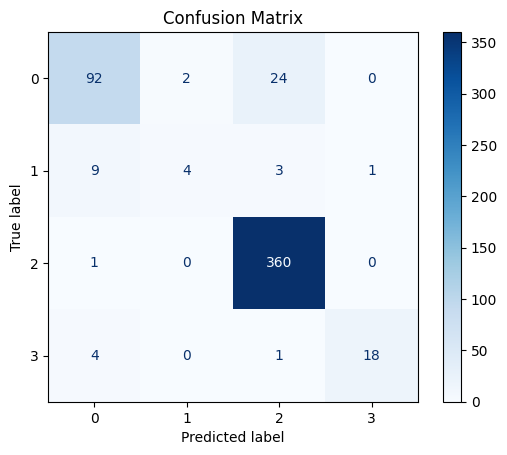

TypeError: object of type 'numpy.int64' has no len()

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from scipy.spatial import Voronoi, voronoi_plot_2d

# Encode categorical features
le = LabelEncoder()
for column in data.columns:
    data[column] = le.fit_transform(data[column])

# Split the data into features and target
X = data.drop('decision', axis=1)  # Use 'decision' as the target column
y = data['decision']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Print the classification report
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Reduce to two dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split the PCA data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Retrain the KNN classifier on the PCA-reduced data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train_pca)

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model):
    h = .02  # Step size in the mesh
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ['#FF0000', '#00FF00', '#0000FF']

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=cmap_bold, edgecolor='k')
    plt.title("Decision Boundary")
    plt.show()

# Plot decision boundaries
plot_decision_boundaries(X_pca, y, knn_pca)

# Plot Voronoi diagram
vor = Voronoi(X_pca)
fig, ax = plt.subplots(figsize=(8, 6))
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='orange', line_width=2, line_alpha=0.6, point_size=15)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1', edgecolor='black')
plt.title("Voronoi Diagram")
plt.show()
